# 单隐层平面数据分类

1）实现一个单隐层二分类问题

2）激活函数：非线性的 (tanh、relu)

3）计算交叉熵损失

4）实现前向及后向传播


## 1 - 导入所需包 ##


In [39]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # 设置种子函数确保结果不变

## 2 - 数据集##


In [40]:
X, Y = load_planar_dataset()

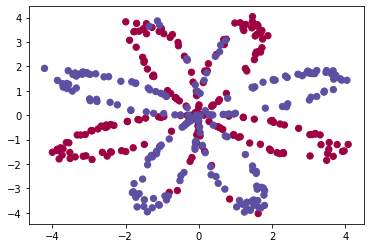

In [41]:
# 数据可视化 ：(注意：c=Y --> c=Y.ravel()):
plt.scatter(X[0,:], X[1,:], c = Y.ravel(),s = 40, cmap = plt.cm.Spectral)

In [42]:
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]  # training set size

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


## 3 - 简单逻辑回归


In [43]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

/home/chenxin/miniconda3/envs/tensorflow_2/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


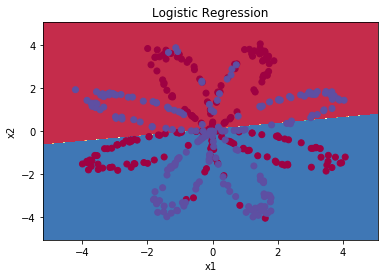

In [44]:
# 画逻辑回归边界
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

## 4 -神经网络模型


**model**:
<img src="images/classification_kiank.png" style="width:600px;height:300px;">

**公式**:

$x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

计算cost $J$ 如下: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

关键步骤：
1）定义神经网络架构
2）初始化参数
3）循环:
    实现前向传播 ->计算损失值 ->实现反向传播 ->更新参数（梯度下降）
    


### 4.1 - 定义神经网络架构 ####

**定义三个变量**: 
    - n_x: 输入层
    - n_h: 隐藏层（默认为4）
    - n_y: 输出层

In [45]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x,n_h,n_y)

In [46]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


### 4.2 - 初始化模型参数 ####

**参数：w、b**:

    w: np.random.randn(a,b) * 0.01
    
    b: np.zeros((a,b))

In [60]:
def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2) # 设置种子函数确保结果不变
                   
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    params = {"W1":W1,
              "b1":b1,
              "W2":W2,
              "b2":b2}
    return params

In [61]:
n_x, n_h, n_y = initialize_parameters_test_case()

params = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(params["W1"]))
print("b1 = " + str(params["b1"]))
print("W2 = " + str(params["W2"]))
print("b2 = " + str(params["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


### 4.3 - 循环 ####

**1）实现前向传播**:
实现步骤：

    1. initialize_parameters() --> params[".."]
    2. 计算Z1、A1、Z2、A2
    
    所用到的激活函数:sigmoid、 np.tanh()
- 反向传播所需的值存储在“cache”中，"cache"将作为反向传播函数的输入。

In [104]:
def forward_propagation(X, params):
    
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    
    Z1 = np.dot(W1,X)  + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1,X.shape[1]))
    
    cache = {"Z1":Z1,
             "A1":A1,
             "Z2":Z2,
             "A2":A2}
    return A2,cache

In [105]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700113 -1.3076660128732143 0.21287768171914198


**2）代价函数公式如下：**

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

**目的** ：实现compute_cost()函数.

**辅助：**
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                #不需要用循环
```

(你可以用 `np.multiply()`、 `np.sum()` 、 `np.dot()`).


In [82]:
def compute_cost(A2, Y, params):
    m = Y.shape[1]
    #第一种
#     J = np.sum(Y * np.log(A2) + (1-Y) * np.log(1 - A2))
#     cost = - J / m
    #第二种
    logprobs = np.multiply(Y, np.log(A2)) + np.multiply((1 - Y), np.log(1 - A2))
    cost = -np.sum(logprobs) / m
    
    cost = np.squeeze(cost)
    assert(isinstance(cost,float))
    return cost

In [83]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


**3）反向传播** 实现 backward_propagation()函数

**公式如下：**
  

<img src="images/grad_summary.png" style="width:600px;height:300px;">

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- 所用函数库:
    - dZ1 --> $g^{[1]'}(Z^{[1]})$.  
    - tanh：$g^{[1]}(.)$ ,  
    - $a = g^{[1]}(z)$  --> $g^{[1]'}(z) = 1-a^2$. 
    - $g^{[1]'}(Z^{[1]})$ --> (1 - np.power(A1, 2)).

In [92]:
def backward_propagation(params, cache, X, Y):
    m = Y.shape[1]
    A2 = cache["A2"]
    A1 = cache["A1"]
    W2 = params["W2"]
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2,A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True) / m
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = np.dot(dZ1,X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
    
    grads = {"dW1":dW1,
             "db1":db1,
             "dW2":dW2,
             "db2":db2}
    return grads
    

In [93]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


**4）更新参数：实现update_parameters()**

**目的**:将grads中的（dW1, db1, dW2, db2）来更新 (W1, b1, W2, b2).

**规则**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$
 , $\alpha$ 是学习率 ，$\theta$ 是参数.

<img src="images/sgd.gif" style="width:400;height:400;"> <img src="images/sgd_bad.gif" style="width:400;height:400;">



In [99]:
def update_parameters(params, grads, learning_rate = 1.2):
    dW1 = grads["dW1"]
    dW2 = grads["dW2"]
    db1 = grads["db1"]
    db2 = grads["db2"]
    
    W1 = params["W1"]
    W2 = params["W2"]
    b1 = params["b1"]
    b2 = params["b2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1 
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    params = {"W1":W1,
              "b1":b1,
              "W2":W2,
              "b2":b2}
    return params

In [100]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


### 4.4 - 实现nn_model() ####


In [114]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost = False):
    np.random.seed(3)
    #第一步：初始化参数
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    params = initialize_parameters(n_x, n_h, n_y)
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    
    for i in range(0,num_iterations):
        
    #第二步：前向传播
        A2, cache = forward_propagation(X, params)
        
    #第三步：计算代价函数
        cost = compute_cost(A2, Y, params)
        
    #第四步：反向传播
        grads = backward_propagation(params, cache, X, Y)
        
    #第五步：更新参数
        params = update_parameters(params, grads)
        
        if print_cost and i % 1000 == 0:
            print("Cost after iteration %i: %f" %(i,cost))
    return params

In [115]:
X_assess, Y_assess = nn_model_test_case()
params = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(params["W1"]))
print("b1 = " + str(params["b1"]))
print("W2 = " + str(params["W2"]))
print("b2 = " + str(params["b2"]))

Cost after iteration 0: 0.692739
Cost after iteration 1000: 0.000218
Cost after iteration 2000: 0.000107
Cost after iteration 3000: 0.000071
Cost after iteration 4000: 0.000053
Cost after iteration 5000: 0.000042
Cost after iteration 6000: 0.000035
Cost after iteration 7000: 0.000030
Cost after iteration 8000: 0.000026
Cost after iteration 9000: 0.000023
W1 = [[-0.65848169  1.21866811]
 [-0.76204273  1.39377573]
 [ 0.5792005  -1.10397703]
 [ 0.76773391 -1.41477129]]
b1 = [[ 0.287592  ]
 [ 0.3511264 ]
 [-0.2431246 ]
 [-0.35772805]]
W2 = [[-2.45566237 -3.27042274  2.00784958  3.36773273]]
b2 = [[0.20459656]]


### 4.5 预测

**规则：**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    


In [124]:
def predict(params, X):
    #第一种：(个人倾向第一种)
    m = X.shape[1]
    A2,cache = forward_propagation(X, params)
    predictions = np.zeros((1,m))
    predictions[A2 > 0.5] = 1
    
    #第二种：
#     A2,cache = forward_propagation(X, params)
#     # np.round() 方法返回浮点数x的四舍五入值
#     predictions = np.round(A2)
    return predictions

In [125]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219556
Cost after iteration 9000: 0.218585


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

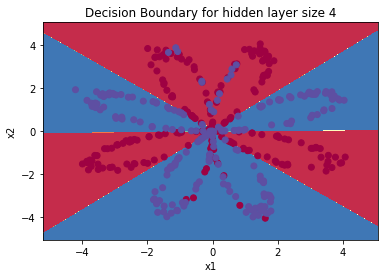

In [126]:
#使用单层nn_model
params = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

plot_decision_boundary(lambda x: predict(params, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

**Expected Output**:

<table style="width:40%">
  <tr>
    <td>**Cost after iteration 9000**</td>
    <td> 0.218607 </td> 
  </tr>
  
</table>


In [127]:
# Print accuracy
predictions = predict(params, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


### 4.6 - 选用不同隐藏层数###


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.0 %
Accuracy for 50 hidden units: 90.25 %


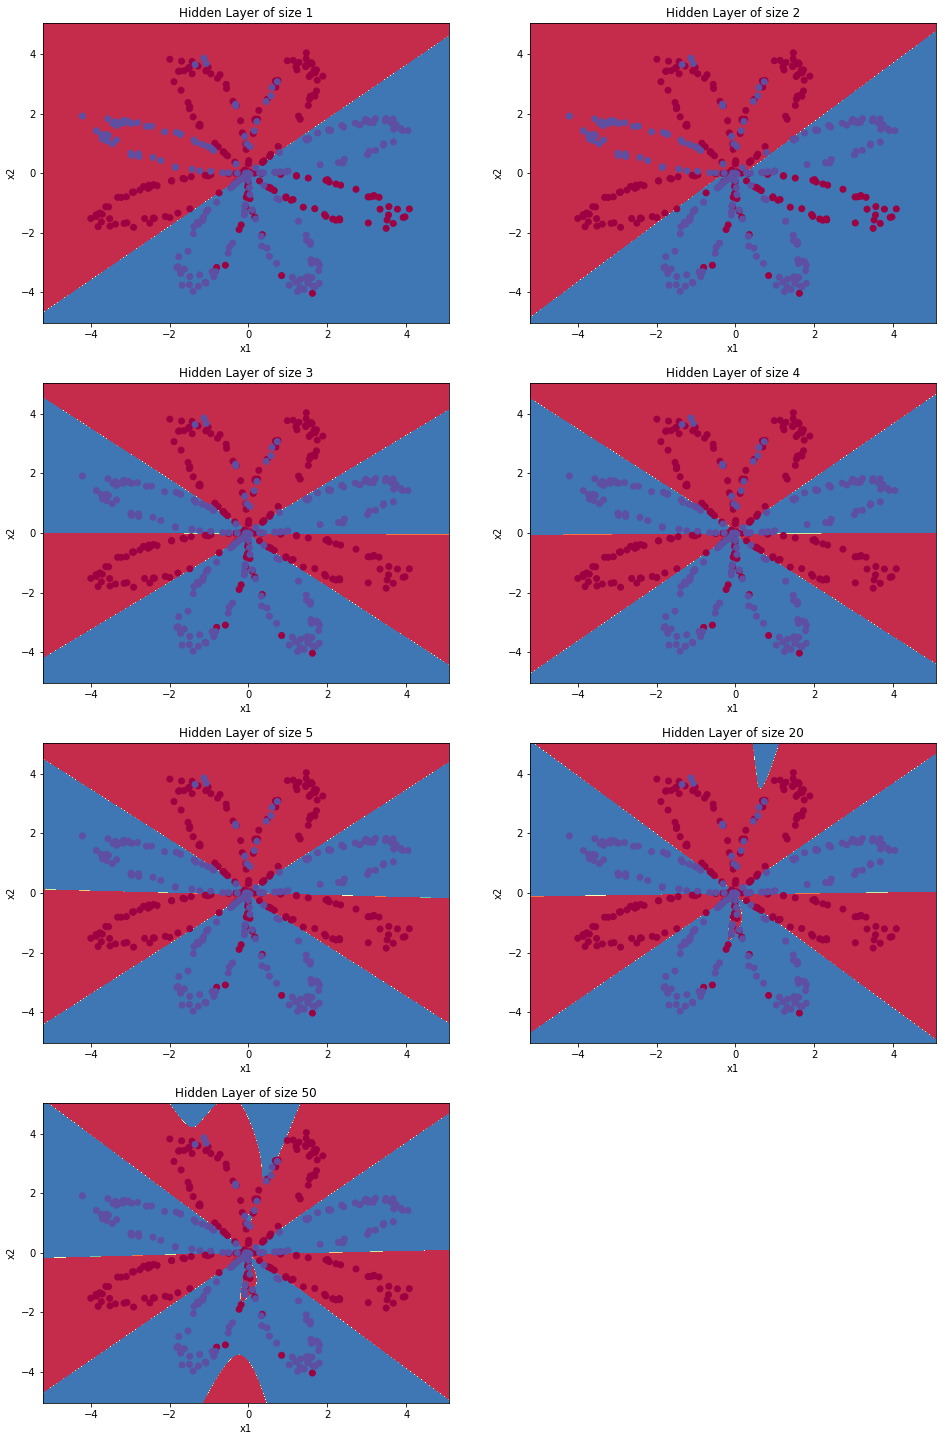

In [128]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    params = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(params, x.T), X, Y)
    predictions = predict(params, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

## 5) 在其他数据集上的表现

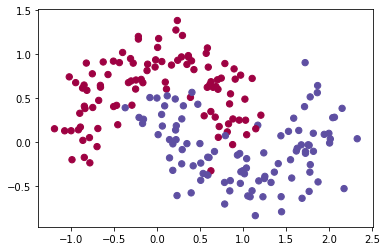

In [132]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

dataset = "noisy_moons"

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])


if dataset == "blobs":
    Y = Y%2
#原代码会出现如下错误:
#ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 200, 'y' with size 200.   

#解决方案第一种：
# import operator
# from functools import reduce
# plt.scatter(X[0, :], X[1, :], c=reduce(operator.add, Y), s=40, cmap=plt.cm.Spectral);

#解决方案第二种：（个人更倾向第二种）
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);

Congrats on finishing this Programming Assignment!

Reference:
- http://scs.ryerson.ca/~aharley/neural-networks/
- http://cs231n.github.io/neural-networks-case-study/